In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [36]:
file1 = "TotalData2"
file2 = "WeatherData"
df = pd.read_csv(file1)
df.head()
weather = pd.read_csv(file2)

In [3]:
mintemp_series = df.groupby('Day').min()['MinTemp']
maxtemp_series = df.groupby('Day').min()['MaxTemp']
amountof_crime = df['Day'].value_counts()
#graphing1.head()



In [4]:
# percentage of the crime that occured over the whole time in 
season = df.groupby("Season")["Season"].count()
season = season / df['ID'].nunique()
print(season)

Season
Fall      0.251179
Spring    0.255809
Summer    0.278276
Winter    0.214736
Name: Season, dtype: float64


In [5]:
# 2,683,565 total crimes
# expected 670,891.25 per season
df.groupby("Season")["Season"].count()

Season
Fall      674054
Spring    686479
Summer    746773
Winter    576259
Name: Season, dtype: int64

In [6]:
observed = pd.Series([674054, 686479, 746773, 576259], index=["Fall", "Spring", "Summer", "Winter"])
statistical_data = pd.DataFrame([observed]).T
statistical_data[1] = 670891.25
statistical_data = statistical_data.rename(columns={0:'Observed',1:'Expected'})
statistical_data

,Observed,Expected
Fall,674054,670891.25
Spring,686479,670891.25
Summer,746773,670891.25
Winter,576259,670891.25


In [7]:
critical_value = stats.chi2.ppf(q = 0.99, df = 3)
critical_value

11.344866730144373

In [8]:
stats.chisquare(statistical_data['Observed'], statistical_data['Expected'])

Power_divergenceResult(statistic=22308.06209016737, pvalue=0.0)

In [9]:
#amount of real crimes committed in each bin
df.groupby("Weather")["Weather"].count()

Weather
30-50 degrees      820475
50-70 degrees      814607
70-90 degrees      704653
Below freezing     335696
Over 90 degrees      8134
Name: Weather, dtype: int64

In [44]:
# expected crime if it were evenly distributed
(weather.groupby('Ranges')['Ranges'].count() / weather['Dates'].nunique()) * 2683565

Ranges
30-50 degrees      857982.544533
50-70 degrees      779684.425676
70-90 degrees      646989.718980
Below freezing     392314.785012
Over 90 degrees      6593.525799
Name: Ranges, dtype: float64

In [38]:
#dates in the entirety
weather['Dates'].nunique()

3256

In [ ]:
#recap of previous three cells
# we have a total of 3256 dates involved
#Below freezing      476
#30-50 degrees      1041
#50-70 degrees       946
#70-90 degrees       785
#Over 90 degrees       8
# which gives us 
#Below freezing     0.146192
#30-50 degrees      0.319717
#50-70 degrees      0.290541
#70-90 degrees      0.241093
#Over 90 degrees    0.002457

In [29]:
observed2 = pd.Series([335696, 820475, 814607, 704653, 8134], index=["Below freezing", "30-50", "50-70", "70-90", "Over 90"])
statistical_data2 = pd.DataFrame([observed2]).T
expected2 = [392314.78, 857982.54, 779684.42, 646989.72, 6593.52]
statistical_data2['Expected'] = expected2
statistical_data2 = statistical_data2.rename(columns={0:'Observed'})
statistical_data2

,Observed,Expected
Below freezing,335696,392314.78
30-50,820475,857982.54
50-70,814607,779684.42
70-90,704653,646989.72
Over 90,8134,6593.52


In [30]:
critical_value2 = stats.chi2.ppf(q = 0.99, df = 4)
critical_value2

13.276704135987622

In [31]:
stats.chisquare(statistical_data2['Observed'], statistical_data2['Expected'])

Power_divergenceResult(statistic=16874.272626418733, pvalue=0.0)

In [32]:
# this is a df of the observed crime on these dates, the expected if crime was evenly distributed, the percentage spike of that
statistical_data2['Percentage'] = statistical_data2['Observed'] / statistical_data2['Expected']
statistical_data2

,Observed,Expected,Percentage
Below freezing,335696,392314.78,0.855680
30-50,820475,857982.54,0.956284
50-70,814607,779684.42,1.044791
70-90,704653,646989.72,1.089125
Over 90,8134,6593.52,1.233635


In [54]:
graphdict = {'Crimes':amountof_crime, 'MinTemp':mintemp_series, 'MaxTemp':maxtemp_series}
graphing1 = pd.DataFrame(graphdict)
graphing1.head()

,Crimes,MinTemp,MaxTemp
2010-01-01,1421,13,19
2010-01-02,793,9,13
2010-01-03,760,12,20
2010-01-04,855,15,23
2010-01-05,912,20,25


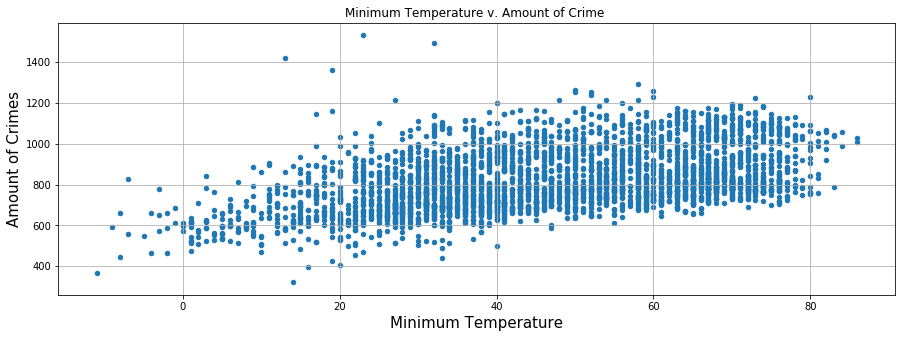

In [52]:
#temperature vs crime on a date
graphing1.plot(kind="scatter", x="MinTemp", y="Crimes", grid=True, figsize=(15,5),
              title="Minimum Temperature v. Amount of Crime ")
plt.xlabel("Minimum Temperature", fontsize=15)
plt.ylabel("Amount of Crimes", fontsize=15)
plt.show()

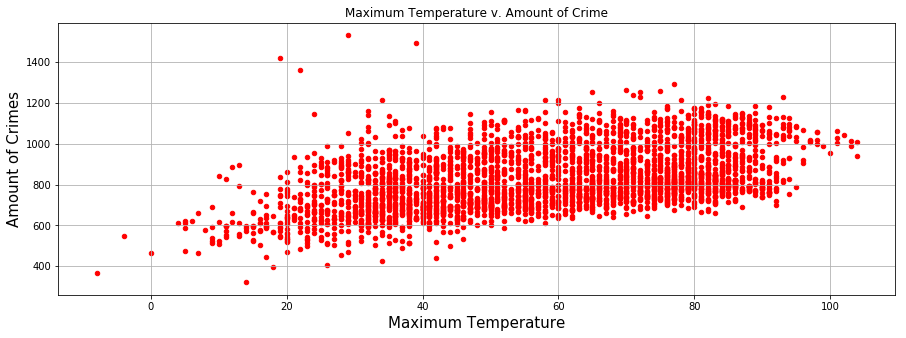

In [56]:
graphing1.plot(kind="scatter", x="MaxTemp", y="Crimes", grid=True, figsize=(15,5),
              title="Maximum Temperature v. Amount of Crime", color='red')
plt.xlabel("Maximum Temperature", fontsize=15)
plt.ylabel("Amount of Crimes", fontsize=15)
plt.show()